In [1]:
import pandas as pd

In [2]:
 !pip install -q kaggle

In [3]:
from google.colab import files
files.upload()         # expire any previous token(s) and upload recreated token

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"victor405","key":"0a3270bf9643cf2954365ace2d585cae"}'}

In [4]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c child-mind-institute-problematic-internet-use

rm: cannot remove '/root/.kaggle': No such file or directory
100% 6.21G/6.21G [03:30<00:00, 29.7MB/s]
100% 6.21G/6.21G [03:30<00:00, 31.7MB/s]


In [5]:
!mkdir '/content/child_mind/'
!unzip /content/child-mind-institute-problematic-internet-use.zip -d '/content/child_mind/'

Archive:  /content/child-mind-institute-problematic-internet-use.zip
  inflating: /content/child_mind/data_dictionary.csv  
  inflating: /content/child_mind/sample_submission.csv  
  inflating: /content/child_mind/series_test.parquet/id=00115b9f/part-0.parquet  
  inflating: /content/child_mind/series_test.parquet/id=001f3379/part-0.parquet  
  inflating: /content/child_mind/series_train.parquet/id=00115b9f/part-0.parquet  
  inflating: /content/child_mind/series_train.parquet/id=001f3379/part-0.parquet  
  inflating: /content/child_mind/series_train.parquet/id=00f332d1/part-0.parquet  
  inflating: /content/child_mind/series_train.parquet/id=01085eb3/part-0.parquet  
  inflating: /content/child_mind/series_train.parquet/id=012cadd8/part-0.parquet  
  inflating: /content/child_mind/series_train.parquet/id=012e3869/part-0.parquet  
  inflating: /content/child_mind/series_train.parquet/id=029a19c9/part-0.parquet  
  inflating: /content/child_mind/series_train.parquet/id=02cebf33/part-0.p

In [6]:
train = pd.read_csv('/content/child_mind/train.csv')
test = pd.read_csv('/content/child_mind/test.csv')
data_dict = pd.read_csv('/content/child_mind/data_dictionary.csv')

# EDA
Análisis exploratorio sencillo de los datos (que datos tenemos, que tipo son los datos, si hay o no datos faltantes, si hay datos numéricos, que distribución tienen, y si hay cualitativos si son ordenados o no por ejemplo).

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 59 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      20 non-null     object 
 1   Basic_Demos-Enroll_Season               20 non-null     object 
 2   Basic_Demos-Age                         20 non-null     int64  
 3   Basic_Demos-Sex                         20 non-null     int64  
 4   CGAS-Season                             10 non-null     object 
 5   CGAS-CGAS_Score                         8 non-null      float64
 6   Physical-Season                         14 non-null     object 
 7   Physical-BMI                            13 non-null     float64
 8   Physical-Height                         13 non-null     float64
 9   Physical-Weight                         13 non-null     float64
 10  Physical-Waist_Circumference            5 non-null      float64


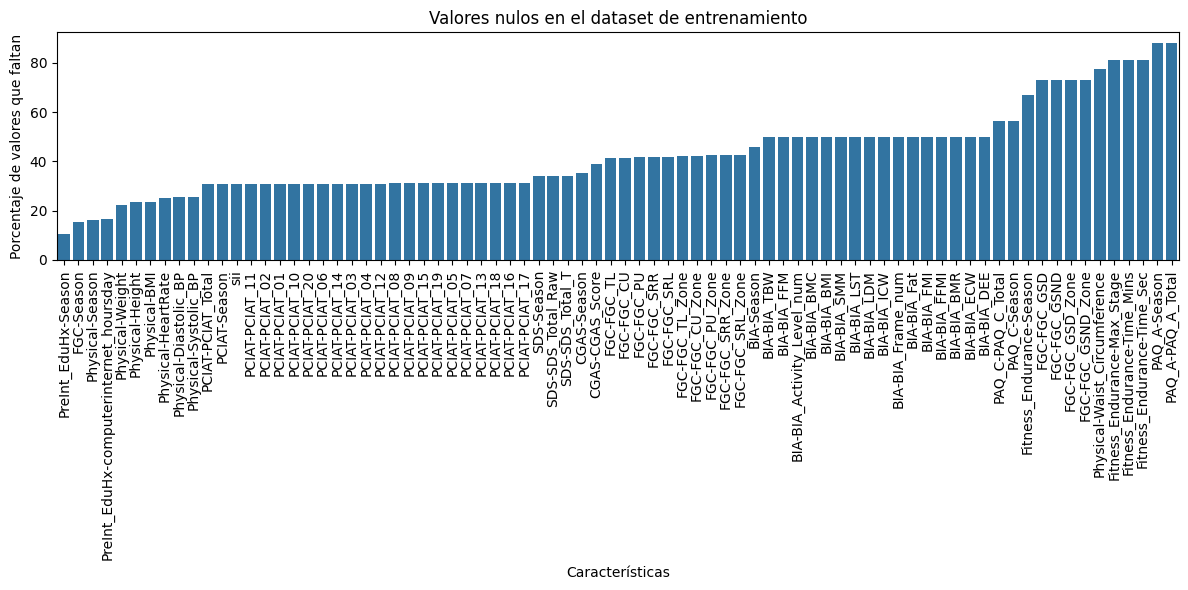

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_percentages = train.isnull().sum() * 100 / len(train)

missing_percentages_sorted = missing_percentages.sort_values()

missing_percentages_sorted = missing_percentages_sorted[missing_percentages_sorted != 0]


plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentages_sorted.index, y=missing_percentages_sorted.values)
plt.xticks(rotation=90)
plt.xlabel("Características")
plt.ylabel("Porcentaje de valores que faltan")
plt.title("Valores nulos en el dataset de entrenamiento")
plt.tight_layout()
plt.show()

Dado a que aproximadamente el 30% de nuestros datos del target están faltantes podemos cidir si queremos eliminar estos datos y trabajar unicamente de forma supervizada, o tomar un acercamiento semi-supervizado y estimar estos valores faltantes para hacer una predicción con todos los datos.

In [35]:
train_supervized = train[train['sii'].notnull()]

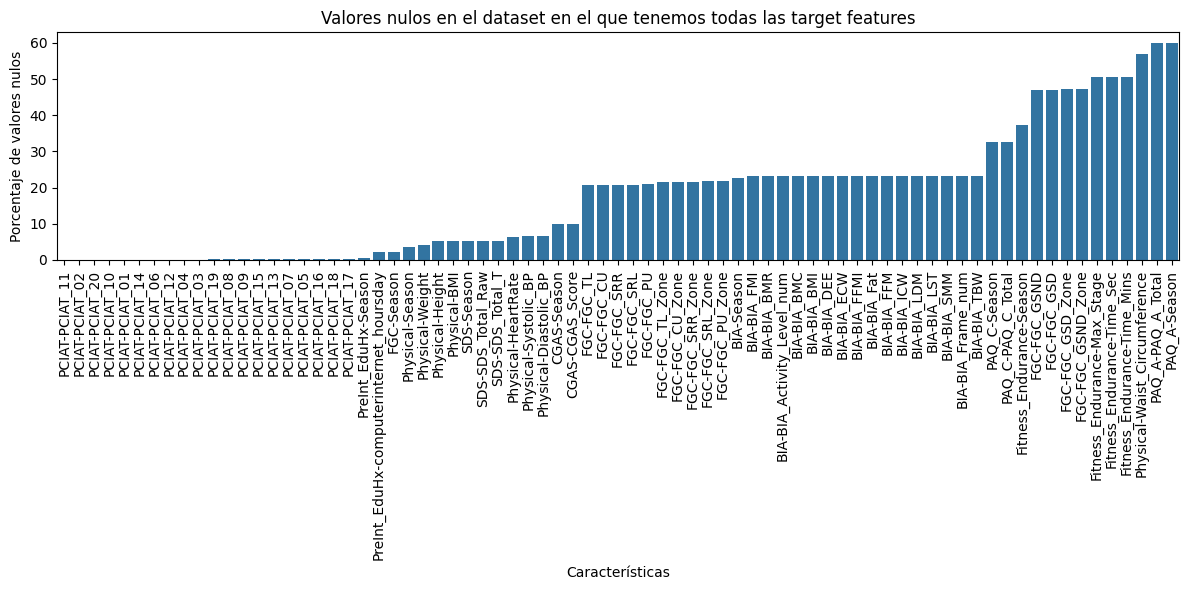

In [36]:
missing_percentages = train_with_target.isnull().sum() * 100 / len(train)

missing_percentages_sorted = missing_percentages.sort_values()

missing_percentages_sorted = missing_percentages_sorted[missing_percentages_sorted != 0]

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentages_sorted.index, y=missing_percentages_sorted.values)
plt.xticks(rotation=90)
plt.xlabel("Características")
plt.ylabel("Porcentaje de valores nulos")
plt.title("Valores nulos en el dataset en el que tenemos todas las target features")
plt.tight_layout()
plt.show()

In [37]:
print('Columnas que no estan en el test:')
print([f for f in train.columns if f not in test.columns])

Columnas que no estan en el test:
['PCIAT-Season', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20', 'PCIAT-PCIAT_Total', 'sii']


In [38]:
train_supervized = train_supervized.drop(['id','PCIAT-Season', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20', 'PCIAT-PCIAT_Total', 'sii'], axis=1)

In [39]:
train_supervized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 0 to 3958
Data columns (total 58 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Enroll_Season               2736 non-null   object 
 1   Basic_Demos-Age                         2736 non-null   int64  
 2   Basic_Demos-Sex                         2736 non-null   int64  
 3   CGAS-Season                             2342 non-null   object 
 4   CGAS-CGAS_Score                         2342 non-null   float64
 5   Physical-Season                         2595 non-null   object 
 6   Physical-BMI                            2527 non-null   float64
 7   Physical-Height                         2530 non-null   float64
 8   Physical-Weight                         2572 non-null   float64
 9   Physical-Waist_Circumference            483 non-null    float64
 10  Physical-Diastolic_BP                   2478 non-null   float64
 

## Demographics, Children's Global Assessment Scale, Physical, PAQ Adolescents and Children


## Bio-electric Impedance Analysis

## Fitness gram child, Sleep disturbance


# Reagrupamiento o visualización de los datos
Algún método de reagrupamiento, o visualización con PCA o t-SNE de los datos de entrenamiento, que permita ver si hay ciertos patrones claros.

# Preprocesamiento y codificación

Preprocesamiento de los datos, y su codificación para usarlos como entrada a un modelo. Hay que tener en cuenta que este preprocesamiento debe poder integrarse mediante pipelines al modelo final.

# Tipo de problema
Decidir si es un problema de clasificación o de regresión (ambos podrían aplicar) y justificar porqué.

# Modelo Inicial
Utilizar un modelo inicial simple que permita establecer un baseline del problema.

# Metodo de busque da hiperparametros y modelo final
Usar algún método de búsqueda de hiperparámetros y seleccionar el modelo de aprendizaje que consideres más adecuado. Justificar la selección.

# Evaluación del módelo
Revisar y mostrar la calidad del modelo retenido usando métodos (los que consideren mejor adaptados) como k-cross-fold-validation, curvas de aprendizaje, curvas RoC, matrices de confusión o métricas de entrenamiento y validación.
